# CASE -1
### Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore”. For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.


The higest number of funding done in city -  Bangalore 635


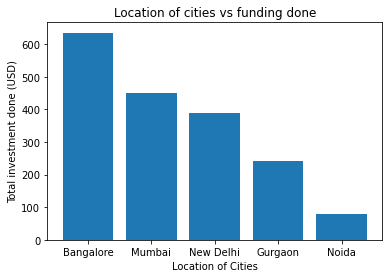

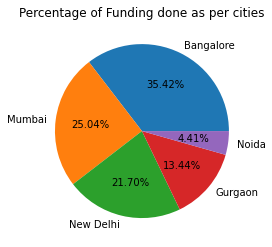

In [132]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.AmountInUSD.fillna("0",inplace=True)
df.CityLocation.fillna("",inplace=True)
df["CityLocation"] = df["CityLocation"].replace(['Delhi', 'bangalore','Pune / US','Bangalore / SFO','New Delhi / US','Bangalore/ Bangkok','Mumbai / NY','New Delhi/ Houston','Bangalore / Palo Alto','Gurgaon / SFO','Mumbai / UK','Noida / Singapore','Mumbai / Global','Pune/Seattle','Pune / Singapore','Chennai/ Singapore','Hyderabad/USA','New Delhi / California','Bangalore / USA','Bangalore / San Mateo','Pune / Dubai'],["New Delhi", 'Bangalore','Pune','Bangalore','New Delhi', 'Bangalore','Mumbai','New Delhi','Bangalore','Gurgaon','Mumbai','Noida','Mumbai','Pune','Pune','Chennai','Hyderabad','New Delhi','Bangalore','Bangalore','Pune'])
d={"Bangalore":0,"Mumbai":0,"Gurgaon":0,"Noida":0,"New Delhi":0}
a=df["CityLocation"].value_counts()
location=["Bangalore","Mumbai","New Delhi","Gurgaon","Noida"]
funding=[]
for i in range(len(location)):
    funding.append(a[location[i]])
print("The higest number of funding done in city - ",a.index[0],a.values[0])
ply.bar(location,funding)
ply.xlabel("Location of Cities")
ply.ylabel("Total investment done (USD)")
ply.title("Location of cities vs funding done")
ply.show()

ply.pie(funding,labels=location,autopct="%.2f%%")
ply.title("Percentage of Funding done as per cities")
ply.show()

# CASE -2
### Even after trying for so many times, your friend's startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.


Top 5 investor who invested maximum number of times
___________________________________________________
Sequoia Capital 64
-----------------
Accel Partners 53
-----------------
Kalaari Capital 44
-----------------
SAIF Partners 41
-----------------
Indian Angel Network 40
-----------------


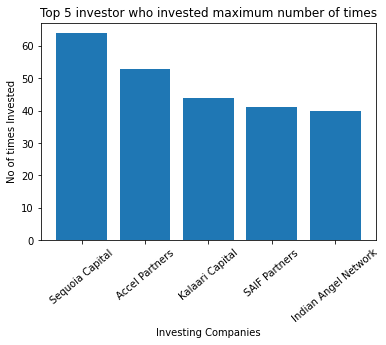

In [134]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.InvestorsName.fillna("",inplace=True)
l=df["InvestorsName"].str.split(',')

l=list(l)
investor={}
for i in l:
    for j in i:
        temp = j.strip()
        if temp in investor:
            investor[temp]+=1
        else:
            investor[temp]=1

investor=dict(sorted(investor.items(),key=operator.itemgetter(1),reverse=True))
total=0
investing_companies=[]
no_of_times_invested=[]
print("Top 5 investor who invested maximum number of times")
print("___________________________________________________")
for i in investor:
    if i=="":
        continue
    if total==5:
        break
    investing_companies.append(i)
    no_of_times_invested.append(investor[i])
    print(i,investor[i])
    print("-----------------")
    total+=1
ply.bar(investing_companies,no_of_times_invested)
ply.xticks(rotation = 40)
ply.xlabel("Investing Companies")
ply.ylabel("No of times Invested")
ply.title("Top 5 investor who invested maximum number of times")
ply.show()

# CASE -3
### After re-analysing the dataset you found outthat some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.


Top 5 investor who invested in different companies
___________________________________________________
Sequoia Capital 48
-------------------
Accel Partners 47
-------------------
Kalaari Capital 41
-------------------
Indian Angel Network 40
-------------------
Blume Ventures 36
-------------------


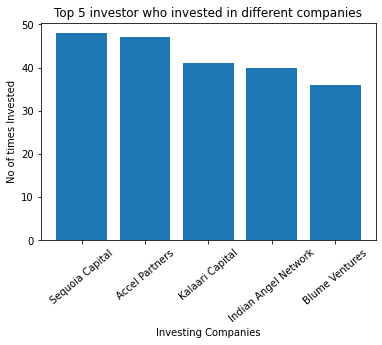

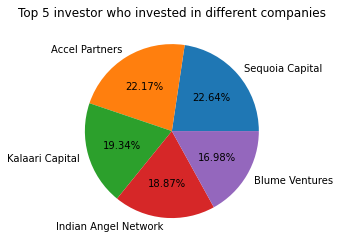

In [135]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.InvestorsName.fillna("",inplace=True)
df["StartupName"]=df['StartupName'].replace(["Ola Cabs","Oyo Rooms","paytm","flipkart","Paytm Marketplace","Olacabs","Oyorooms","OYO Rooms","OyoRooms","Flipkart.com"],["Ola","Oyo","Paytm","Flipkart","Paytm","Ola","Oyo","Oyo","Oyo","Flipkart"])
l=df["InvestorsName"].str.split(",")
investor={}
index=0
for i in l:
    c=df["StartupName"][index]
    for j in i:
        temp = j.strip()
        if temp in investor:
            investor[temp]+=[c]
        else:
            investor[temp]=[c]
    index+=1
for i in investor:
    investor[i]=len(set(investor[i]))
investor=dict(sorted(investor.items(),key=operator.itemgetter(1),reverse=True))
total=0
investing_companies=[]
no_of_times_invested=[]
print("Top 5 investor who invested in different companies")
print("___________________________________________________")
for i in investor:
    if i=="":
        continue
    if total==5:
        break
    investing_companies.append(i)
    no_of_times_invested.append(investor[i])
    print(i,investor[i])
    print("-------------------")
    total+=1
ply.bar(investing_companies,no_of_times_invested)
ply.xticks(rotation = 40)
ply.xlabel("Investing Companies")
ply.ylabel("No of times Invested")
ply.title("Top 5 investor who invested in different companies")
ply.show()
ply.pie(no_of_times_invested,labels=investing_companies,autopct="%.2f%%")
ply.title("Top 5 investor who invested in different companies")
ply.show()

# CASE-4
### Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Top 5 investor who invested in different Startup as Seed Funding and Crowdfunding.
___________________________________________________
Indian Angel Network 33
-------------------
Rajan Anandan 23
-------------------
LetsVenture 16
-------------------
Anupam Mittal 16
-------------------
Kunal Shah 14
-------------------


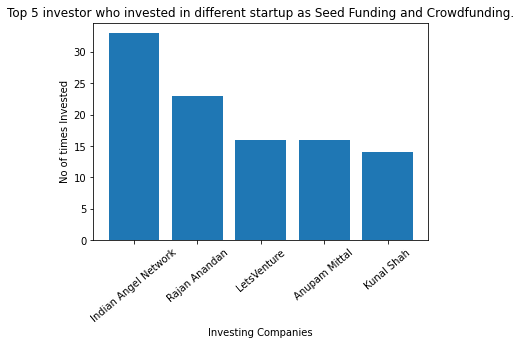

In [136]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.AmountInUSD.fillna("0",inplace=True)
df.InvestmentType.fillna("",inplace=True)
df.InvestorsName.dropna(inplace=True)
df["InvestmentType"]=df["InvestmentType"].replace(["PrivateEquity","SeedFunding","Crowd funding"],["Private Equity","Seed Funding","Crowd Funding"])
df["StartupName"]=df['StartupName'].replace(["Ola Cabs","Oyo Rooms","paytm","flipkart","Paytm Marketplace","Olacabs","Oyorooms","OYO Rooms","OyoRooms","Flipkart.com","Undisclosed Investors","Undisclosed investors"],["Ola","Oyo","Paytm","Flipkart","Paytm","Ola","Oyo","Oyo","Oyo","Flipkart","",""])
df=df[(df["InvestmentType"]=="Seed Funding") | (df["InvestmentType"]=="Crowd Funding" )]
df.reset_index(drop = True,inplace=True)
l=df["InvestorsName"].str.split(',')
l=list(l)
investor={}
index=0
for i in l:
    c=df["StartupName"][index]
    if type(i)!=float:
        for j in i:
            temp=j.strip()
            if temp in investor:
                investor[temp]+=[c]
            else:
                investor[temp]=[c]
    else:
        a=str(i)
        temp=a.strip()
        if temp in investor:
            investor[temp]+=[c]
        else:
            investor[temp]=[c]
    index+=1
for i in investor:
    investor[i]=len(set(investor[i]))
investor=dict(sorted(investor.items(),key=operator.itemgetter(1),reverse=True))
total=0
investing_companies=[]
no_of_times_invested=[]
print("Top 5 investor who invested in different Startup as Seed Funding and Crowdfunding.")
print("___________________________________________________")
for i in investor:
    if i=="Undisclosed Investors"  or i=="" or i=="Undisclosed investors":
        continue
    if total==5:
        break
    investing_companies.append(i)
    no_of_times_invested.append(investor[i])
    print(i,investor[i])
    print("-------------------")
    total+=1
ply.bar(investing_companies,no_of_times_invested)
ply.xticks(rotation = 40)
ply.xlabel("Investing Companies")
ply.ylabel("No of times Invested")
ply.title("Top 5 investor who invested in different startup as Seed Funding and Crowdfunding.")
ply.show()

# Case -5
### Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Top 5 investor in Growth Stage companies
___________________________________________________
Sequoia Capital 45
-------------------
Accel Partners 43
-------------------
Kalaari Capital 35
-------------------
Blume Ventures 27
-------------------
SAIF Partners 24
-------------------


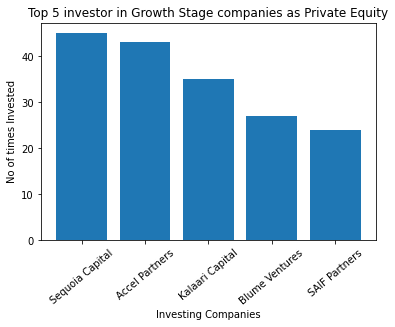

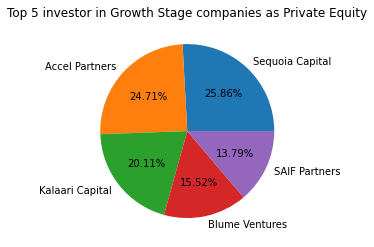

In [139]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.AmountInUSD.fillna("0",inplace=True)
df.InvestmentType.fillna("",inplace=True)
df.InvestorsName.dropna(inplace=True)
df["InvestmentType"]=df["InvestmentType"].replace(["PrivateEquity","SeedFunding","Crowd funding"],["Private Equity","Seed Funding","Crowd Funding"])
df["StartupName"]=df['StartupName'].replace(["Ola Cabs","Oyo Rooms","paytm","flipkart","Paytm Marketplace","Olacabs","Oyorooms","OYO Rooms","OyoRooms","Flipkart.com","Undisclosed Investors","Undisclosed investors"],["Ola","Oyo","Paytm","Flipkart","Paytm","Ola","Oyo","Oyo","Oyo","Flipkart","",""])
df=df[(df["InvestmentType"]=="Private Equity") ]
df.reset_index(drop = True,inplace=True)
l=df["InvestorsName"].str.split(',')
l=list(l)
investor={}
index=0
for i in l:
    c=df["StartupName"][index]
    if type(i)!=float:
        for j in i:
            temp=j.strip()
            if temp in investor:
                investor[temp]+=[c]
            else:
                investor[temp]=[c]
    else:
        a=str(i)
        temp=a.strip()
        if temp in investor:
            investor[temp]+=[c]
        else:
            investor[temp]=[c]
    index+=1
for i in investor:
    investor[i]=len(set(investor[i]))
investor=dict(sorted(investor.items(),key=operator.itemgetter(1),reverse=True))
total=0
investing_companies=[]
no_of_times_invested=[]
print("Top 5 investor in Growth Stage companies")
print("___________________________________________________")
for i in investor:
    if i=="" or i=="Undisclosed investors":
        continue
    if total==5:
        break
    investing_companies.append(i)
    no_of_times_invested.append(investor[i])
    print(i,investor[i])
    print("-------------------")
    total+=1
ply.bar(investing_companies,no_of_times_invested)
ply.xticks(rotation = 40)
ply.xlabel("Investing Companies")
ply.ylabel("No of times Invested")
ply.title("Top 5 investor in Growth Stage companies as Private Equity")
ply.show()
ply.pie(no_of_times_invested,labels=investing_companies,autopct="%.2f%%")
ply.title("Top 5 investor in Growth Stage companies as Private Equity")
ply.show()